#**Sentiment Analysis of Tweets using Python**

In [3]:
# Mount g-drive for storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Imoort the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [6]:
# Load twitter developer details
from google.colab import files
login = files.upload()

Saving login.csv to login.csv


In [25]:
log = pd.read_csv('login.csv')
log.head()

,type,key,secret
0,customer,02xUHuCgjuQF5KAAm34YEMrT7,3Lbhe6RKb9cugVMlou4hes15ZJp3nSlSNPiseucd2t8zX8...
1,access,1082656464714547202-mqMJMzLQ0QqocGZG0WQ6VsZTFm...,HxlFgwqMuO7eGauUN97SnmEww1yvuqx7LhnfOKlmzgsjr


In [11]:
# Twitter API credentials
consumer_key = log['key'][0]
consumer_secret = log['secret'][0]
access_token = log['key'][1]
access_token_secret = log['secret'][1]


# Setting up twitter api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [16]:
# Extract 100 tweets from BillGates account
post = api.user_timeline(screen_name="BillGates", count=100, lang="en",tweet_mode="extended")

# Show the 5 most recent tweets from the account
i = 0
for tweet in post[0:5]:
  i +=1
  print(str(i) + ") " + tweet.full_text + "\n")

1) We’re so grateful for Japan’s generosity. We all have a part to play in the #FightForWhatCounts: ending AIDS, tuberculosis, and malaria and building resilient health systems that will keep us safe from future pandemics. https://t.co/1stigbWdFI

2) Interesting findings from @zearned on how to tackle learning disruptions from COVID-19 and help all kids move forward in their math learning. https://t.co/kjthRco0bl

3) It’s encouraging that there’s more public support for taking big steps to avoid a climate disaster than ever before. My book suggests a lot of ideas – and it’s now available in paperback: https://t.co/PpoWh22buC https://t.co/Un1BME9sst

4) It’s easy to forget how scary polio was in the United States and around the world. This is a powerful reminder. https://t.co/P22TxXJEW4

5) Damaris Matoke-Muhia is changing the fight against malaria and gender inequity. And her personal story is phenomenal. https://t.co/gxlrlkex08



In [26]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in post], columns=["tweets"])

# Preview the first 5 rows
df.head()

,tweets
0,We’re so grateful for Japan’s generosity. We a...
1,Interesting findings from @zearned on how to t...
2,It’s encouraging that there’s more public supp...
3,It’s easy to forget how scary polio was in the...
4,Damaris Matoke-Muhia is changing the fight aga...


In [36]:
# Clean the text

# Create a funtion to clean tweets

def cleanTxt(text):
  text = re.sub(r"@[A-Za-z0-9]+", "", text) #Remove @mentions
  text = re.sub(r"#", "", text) #Removing the '#' symbol
  test = re.sub(r'RT[\s]+',"", text) #Removing RT
  text = re.sub(r"https?:\/\/\S+", "", text) #Remove the hyper link

  return text

df["tweets"] = df["tweets"].apply(cleanTxt)

# Show first five rows
df.head()

,tweets
0,We’re so grateful for Japan’s generosity. We a...
1,Interesting findings from on how to tackle le...
2,It’s encouraging that there’s more public supp...
3,It’s easy to forget how scary polio was in the...
4,Damaris Matoke-Muhia is changing the fight aga...


###Create two new columns to store all of the subjectivity and polarity

- The subjectivity tells how subjective or opinionated a text is


In [37]:
# Create a function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a fucntion to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df["subjectivity"] = df["tweets"].apply(getSubjectivity)
df["polarity"] = df["tweets"].apply(getPolarity)

#Show first five row of the new dataframe
df.head()

,tweets,subjectivity,polarity
0,We’re so grateful for Japan’s generosity. We a...,0.312500,0.250000
1,Interesting findings from on how to tackle le...,0.500000,0.500000
2,It’s encouraging that there’s more public supp...,0.266667,0.225000
3,It’s easy to forget how scary polio was in the...,0.944444,0.077778
4,Damaris Matoke-Muhia is changing the fight aga...,0.400000,0.250000


###Check how the sentiment are distributed
A good way to do this is by understanding the common word by plot them using word cloud also know as text cloud

(-0.5, 499.5, 299.5, -0.5)

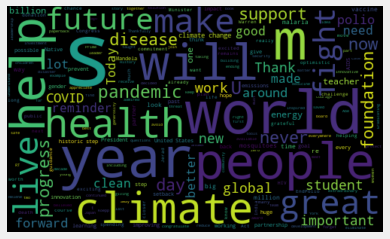

In [40]:
# Plot of words using WordCloud
allwords = " ".join([tweets for tweets in df["tweets"]])
wordCloud = WordCloud(width=500, height=300,random_state=28, max_font_size=119 ).generate(allwords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")

In [42]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return "Negative"
  elif score >0:
    return "Positive"
  else:
    return "Neutral"

df["analysis"] = df["polarity"].apply(getAnalysis)

# Show first five of new df frame
df.head()

,tweets,subjectivity,polarity,analysis
0,We’re so grateful for Japan’s generosity. We a...,0.312500,0.250000,Positive
1,Interesting findings from on how to tackle le...,0.500000,0.500000,Positive
2,It’s encouraging that there’s more public supp...,0.266667,0.225000,Positive
3,It’s easy to forget how scary polio was in the...,0.944444,0.077778,Positive
4,Damaris Matoke-Muhia is changing the fight aga...,0.400000,0.250000,Positive


In [44]:
# Print all of the positive tweets
j =1 
sortedDF = df.sort_values(by=["polarity"])
for i in range(0, sortedDF.shape[0]):
  if sortedDF["analysis"][i] == "Positive":
    print(str(j) + ") " + sortedDF["tweets"][i])
    j += 1


1) We’re so grateful for Japan’s generosity. We all have a part to play in the FightForWhatCounts: ending AIDS, tuberculosis, and malaria and building resilient health systems that will keep us safe from future pandemics. 
2) Interesting findings from  on how to tackle learning disruptions from COVID-19 and help all kids move forward in their math learning. 
3) It’s encouraging that there’s more public support for taking big steps to avoid a climate disaster than ever before. My book suggests a lot of ideas – and it’s now available in paperback:  
4) It’s easy to forget how scary polio was in the United States and around the world. This is a powerful reminder. 
5) Damaris Matoke-Muhia is changing the fight against malaria and gender inequity. And her personal story is phenomenal. 
6) I cannot agree with _HamidJafari more: women vaccinators are vitally important in reaching every last child with polio vaccines. Thank you to  and everyone in the   community for continuing to support the 

In [45]:
# Print all of the negative tweets
j =1 
sortedDF = df.sort_values(by=["polarity"])
for i in range(0, sortedDF.shape[0]):
  if sortedDF["analysis"][i] == "Negative":
    print(str(j) + ") " + sortedDF["tweets"][i])
    j += 1

1) In the past 16 years the world has made immense strides in protecting children from life-threatening diarrhea. Today, I congratulate Nigeria on introducing this vaccine, which will protect generations of Nigerian children. 
2) Years ago, the idea of using mosquitoes as an ally in the fight against diseases sounded crazy. But as  of  explains, this innovative solution has already saved lives around the world. 
3) I am honored to receive this award. Thank you, Foreign Minister Hayashi. 
4) Inside a two-story brick building in Medellín, Colombia, scientists work long hours in muggy labs breeding millions and millions of mosquitoes:  
5) This $369 billion investment will spark innovation, drive job creation, and reduce energy prices and emissions. It sets a clear example of what serious climate action looks like.
6) “Outbreaks are inevitable, but pandemics are optional.” – 

This  video gives you a glimpse of how Big History is helping students connect the present to the past:  
7) If w

In [48]:
# Print all of the neutral tweets
j =1 
sortedDF = df.sort_values(by=["polarity"])
for i in range(0, sortedDF.shape[0]):
  if sortedDF["analysis"][i] == "Neutral":
    print(str(j) + ") " + sortedDF["tweets"][i])
    j += 1

1) Thank you, President Yoon, for your leadership in global health. I look forward to our continued partnership to reduce the burden of disease. 
2) It's here:  
3) We cannot look away from the impact climate change is already having on the most vulnerable. 
4) RT : The Inflation Reduction Act of 2022 is a historic step that will move the U.S. closer to its climate and energy security…
5) ._pb any tips for my form?
6) Congratulations  for yet another milestone of administering 200crorevaccinations. We are grateful for our continued partnership with Indian vaccine manufacturers and the Indian government for mitigating the impact of COVID19.  
7) Nelson Mandela's legacy lives on as a reminder that it’s possible to solve big challenges. I admired President Mandela for his courage to stand against apartheid and I came to know him personally for the fight against HIV/AIDs. 
8) “It’s also a reminder that it’s not just about having enough vaccines or therapeutics. It’s about figuring out how 

Text(0, 0.5, 'Subjectivity')

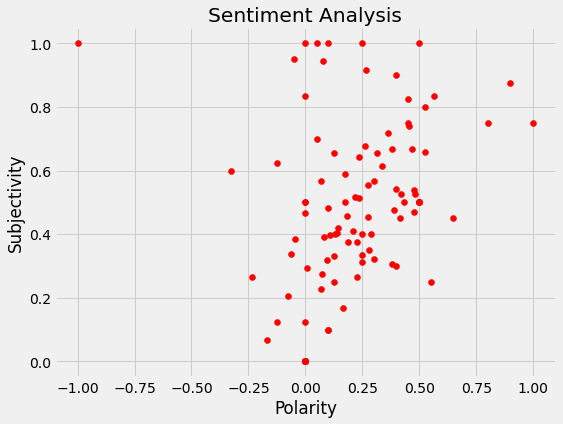

In [49]:
# plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["polarity"][i], df["subjectivity"][i], color="Red")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")


Text(0.5, 1.0, 'Distribution of Sentiment Analysis')

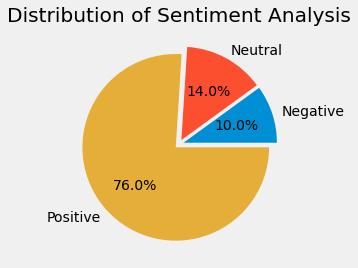

In [74]:
# Get percentage of positive tweet
explode = (0.05, 0.05, 0.05)
plt.pie(
df.groupby(df['analysis'])["tweets"].count()/df.shape[0] * 100,
labels=df.groupby(df['analysis']).count().index,
autopct='%1.1f%%',
explode=[0.05, 0.05, 0.05]
);
plt.title("Distribution of Sentiment Analysis")